## Home assignement 2



In [80]:
# import numpy for array manipulation and fft
import numpy as np
# import filtering functionalities from scipy.signal
from scipy.signal import lfilter, filtfilt, butter
# plotting functionalities
import matplotlib.pyplot as plt
# import numpy fft
from numpy.fft import fft, fftshift, fftfreq


If you want to give back the assignement as a jupyter notebook, the following command triggers inline plot.

In [81]:
%matplotlib inline

## Part 1: Multi-frequency signal

We create a function to generate a signal with multiple frequency peaks at multiple locations in time. It will be sum of time-frequency atom functions $x_k$ of the form 
$$
x_{\mu_k,\sigma_k,a_k,f_k}(t)=a_k \cos (2 \pi f_k t)e^{\frac{-(t-\mu_k)^2}{2\sigma_k^2}}
$$

**Question** 1-a: give the analytical expression of the Fourier transform of such atom. (2 points)

*Hint: use the expression of the Fourier transform of a Gaussian from the lecture, as well as multiple calculation rules*

Now we will use the following routine to generate such signal.

In [82]:
def gaussSig(mus,sigmas,amps,freqs,t):
    '''
    Generate a signal based on time frequency atoms:
    Arguments:
    - mus: list/array of time locations
    - sigmas: list/array of temporal widths
    - amps: list/array of amplitudes
    - freqs: list/array of frequency locations
    - t: 1D array of time points
    
    Output:
    - fct: signal evaluated at the given time points
    '''
    fct = 0
    for i in range(len(mus)):
        fct += amps[i]*np.cos(2.*np.pi*freqs[i]*(t))*np.exp(- (t - mus[i])**2/(sigmas[i])**2/2)
    return fct


And use the following signal $x(t)$, sum of three different atoms, sampled at frequency 1kHz = 1000Hz (we use dt=.001 as sampling period).

Text(0.5, 0, 'time (s)')

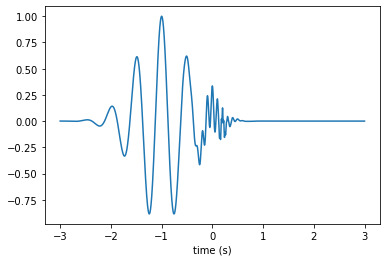

In [83]:
dt=.001;
t = np.arange(-3,3,dt)
mus=[-1,0,.2]
sigmas=[.5,.2,.05]
amps=[1, .2 ,.05]
freqs=[2.,10.,40.]
x = gaussSig(mus,sigmas,amps,freqs,t)
plt.plot(t,x)
plt.xlabel('time (s)')

**Question** 1-b: compute and plot an estimate of the absolute value of the continuous Fourier transform of such signal based on the work done in assignement 1 (using the FFT algorithm). Pay attention to define the frequency axis in physical units (Hz). Use a logrithmic scale For the y-axis. (2)

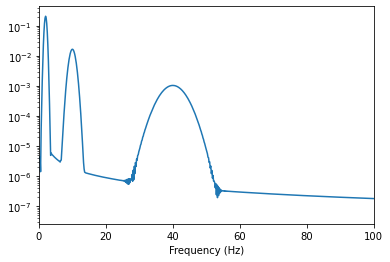

In [84]:
xf = fftshift(fft(x))
f = fftshift(fftfreq(t.size))*(1/dt)
plt.plot(f, 2.0/(t.size) * np.abs(xf))
plt.xlim(0, 100)
plt.yscale('log')
plt.xlabel("Frequency (Hz)")
plt.show()

**Question 1**-c: Explain with maximum detail, how the above plot matches the analytical expression of the Fourier transform established in Q1-a (notably, identify the characteristics of the different atoms composing the signal). (2 points, optional).

The fourier transform of an atom (in the positive frequency domain) is a gaussian of variance $1/\sigma_k^2$ and amplitude $\sqrt{2\pi^3}a_k\sigma_k$ centered around $f_k$. In the figure above, we can see three gaussians centered around 2 Hz, 10 Hz, and 40 Hz respectively, which corresponds with the frequencies of the three atoms. We know that $\sigma_1 = 0.5, \sigma_2 = 0.2, \sigma_3 = 0.05$. Hence, we would expect the variance of the first gaussian in the fourier transform to be the smallest and that of the last one to be the largest, which is what is observed in the figure above. The amplitude of the fourier transform is proportional to $\sigma_ka_k$. $\sigma_1a_1 = 0.5, \sigma_2a_2 = 0.04, \sigma_3a_3 = 0.0025$. The amplitudes of the peaks follow the same order.

## Part 2: Butterworth filters
We will now illustrate band-pass filtering using Infinite Impulse Response filters (IIR). More specifically, we will use the Butterworth filter design routine from the scipy.signal toolbox. This type of filter design is based on a familly of analog (continuous time) filter that can be converted to the digital filters using a specific transformation. One interest of these filters that they require much less coefficients to implement a sharp frequency response due to their recursivity.

In [85]:
help(butter)

Help on function butter in module scipy.signal.filter_design:

butter(N, Wn, btype='low', analog=False, output='ba', fs=None)
    Butterworth digital and analog filter design.
    
    Design an Nth-order digital or analog Butterworth filter and return
    the filter coefficients.
    
    Parameters
    ----------
    N : int
        The order of the filter.
    Wn : array_like
        The critical frequency or frequencies. For lowpass and highpass
        filters, Wn is a scalar; for bandpass and bandstop filters,
        Wn is a length-2 sequence.
    
        For a Butterworth filter, this is the point at which the gain
        drops to 1/sqrt(2) that of the passband (the "-3 dB point").
    
        For digital filters, `Wn` are in the same units as `fs`.  By default,
        `fs` is 2 half-cycles/sample, so these are normalized from 0 to 1,
        where 1 is the Nyquist frequency. (`Wn` is thus in
        half-cycles / sample.)
    
        For analog filters, `Wn` is an angular

**Question** 2-a. Define a 3-order bandpass Butterworth filter for the band 8-12Hz to select the 10Hz frequency. Plot the two sets of coefficients of the filter. Note the special convention: the frequency parameters 
are normalized using **half** the sampling frequency!!. (2 points)

Text(0.5, 1.0, 'Butterworth coefficient a')

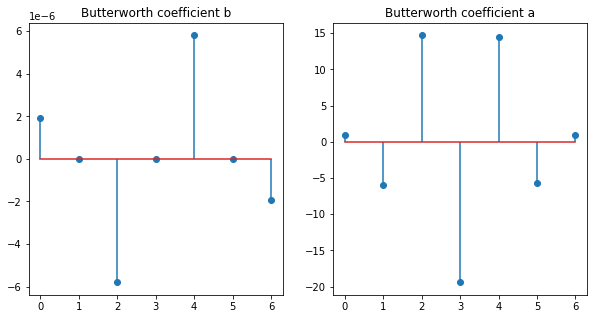

In [86]:
lowcut = 8
highcut = 12
order = 3

nyq = 0.5 * (1/dt)
low = lowcut / nyq
high = highcut / nyq
b, a = butter(order, [low, high], btype='band')

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax[0].stem(b)
ax[0].set_title("Butterworth coefficient b")

ax[1].stem(a)
ax[1].set_title("Butterworth coefficient a")

**Question** 2-b: Using the signal $x$ of Q1 as input to the filter, compute the output of the filter using the lfilter routine. Plot the input and output on a same graph (using a linear scale). Interpret the result, does the filtering give the expected result? (2 points)

In [87]:
mus=[0]
sigmas=[.2,]
amps=[.2]
freqs=[10.]
x_10Hz = gaussSig(mus,sigmas,amps,freqs,t)

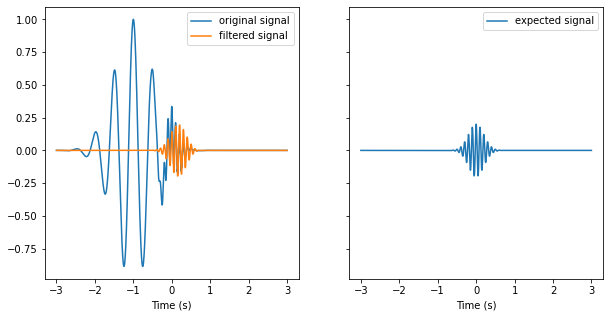

In [88]:
x_filtered_3 = lfilter(b, a, x)

fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(10, 5))

ax[0].plot(t, x, label='original signal')
ax[0].plot(t, x_filtered_3, label='filtered signal')
ax[0].set_xlabel("Time (s)")
ax[0].legend()

ax[1].plot(t, x_10Hz, label='expected signal')
ax[1].set_xlabel("Time (s)")
ax[1].legend()

From the two figures above, it can be seen that the filtered signal looks very similar to the expected signal (i.e., the atom centered at 10 Hz)

The order parameter affects how rapidly the frequencies outside the passband are attenuated 
(as a function of the distance to the passband). For example, selecting a smaller order results in more prominent peaks for the lowest and largest input frequencies.

**Question** 2-c. Repeat the design of IIR filter in Question 2-a with an order of 2. Plot the Fourier transform of the unfiltered signal and the filtered signals with the order of 2 and 3 using a logarithmic scale for the y-axis, and a linear scale for the frequency axis. Interpret the effect of the order of the filter in this plot. (2 points)

In [89]:
x_filtered_2 = lfilter(*butter(2, [low, high], btype='band'), x)

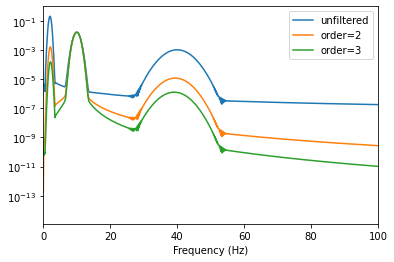

In [90]:
x_filtered_2_f = fftshift(fft(x_filtered_2))
x_filtered_3_f = fftshift(fft(x_filtered_3))
f = fftshift(fftfreq(t.size))*(1/dt)

plt.plot(f, 2.0/(t.size) * np.abs(xf), label='unfiltered')
plt.plot(f, 2.0/(t.size) * np.abs(x_filtered_2_f), label='order=2')
plt.plot(f, 2.0/(t.size) * np.abs(x_filtered_3_f), label='order=3')
plt.xlim(0, 100)
plt.yscale('log')
plt.legend()
plt.xlabel("Frequency (Hz)")
plt.show()

We would expect the peaks outside pass-band of the filter to be smaller in the case of the 3rd order filter. This is indeed what we see in the figure above: The peak within the pass-band looks the same for both filters, but the other peaks (i.e., 2 Hz and 40 Hz) are smaller in the case of the 3rd order filter.


**Question** 2-d: for an arbitrary **real-valued** impulse response $h$, consider the (discrete time) LTI system with impulse response $h*h_\sigma$, convolving $h$ with $h_\sigma[k]=h[-k]$. Compute the frequency response of this system and deduce that it applies a zero-phase lag to any input frequency. (2 points)

Such "zero-phase filter" can be implemented using the routine filtfilt.

In [91]:
help(filtfilt)

Help on function filtfilt in module scipy.signal.signaltools:

filtfilt(b, a, x, axis=-1, padtype='odd', padlen=None, method='pad', irlen=None)
    Apply a digital filter forward and backward to a signal.
    
    This function applies a linear digital filter twice, once forward and
    once backwards.  The combined filter has zero phase and a filter order
    twice that of the original.
    
    The function provides options for handling the edges of the signal.
    
    The function `sosfiltfilt` (and filter design using ``output='sos'``)
    should be preferred over `filtfilt` for most filtering tasks, as
    second-order sections have fewer numerical problems.
    
    Parameters
    ----------
    b : (N,) array_like
        The numerator coefficient vector of the filter.
    a : (N,) array_like
        The denominator coefficient vector of the filter.  If ``a[0]``
        is not 1, then both `a` and `b` are normalized by ``a[0]``.
    x : array_like
        The array of data to b

**Question** 2-e. Apply *filtfilt*  to Butterworth filter designed in Question 2-a to filter the atom signal. Plot the filtered signals, and the modulus (in semilogy scale) of its Fourier transform and compare the difference with the outcome of *lfilter*. Interpret in line with the above theory question.  (2 points)

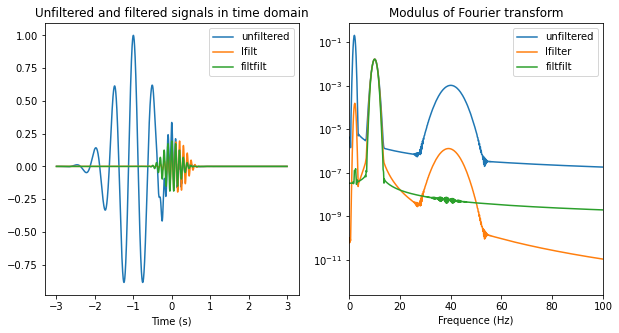

In [92]:
b, a = butter(3, [low, high], btype='band')
x_filtfilt_3 = filtfilt(b, a, x)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax[0].plot(t, x, label='unfiltered')
ax[0].plot(t, x_filtered_3, label='lfilt')
ax[0].plot(t, x_filtfilt_3, label='filtfilt')
ax[0].legend()
ax[0].set_xlabel("Time (s)")
ax[0].set_title("Unfiltered and filtered signals in time domain")

x_filtfilt_3_f = fftshift(fft(x_filtfilt_3))

ax[1].plot(f, 2.0/(t.size) * np.abs(xf), label='unfiltered')
ax[1].plot(f, 2.0/(t.size) * np.abs(x_filtered_3_f), label='lfilter')
ax[1].plot(f, 2.0/(t.size) * np.abs(x_filtfilt_3_f), label='filtfilt')
ax[1].set_xlim(0, 100)
ax[1].set_yscale('log')
ax[1].legend()
ax[1].set_xlabel("Frequence (Hz)")
ax[1].set_title("Modulus of Fourier transform")

plt.show()

We can see that the green plot (filtfilt) is in phase with the unfilitered signal whereas the orange one (lfilt) is slightly out of phase. This is because filtfilt does not apply a phase difference.

Now we illustrate an important consequence of the uncertainty principle on filter design. 

**Question** 2-f. Assume we want to be more selective and make the selected frequency band narrower. Design a bandpass Butterworth filter as in Question 2-a but with a narrower passband width (1Hz) around 10Hz. Apply the filter to the atom signal and plot the filtered signal in comparison to the original signal. Explain qualitatively why the filtered waveform at 10Hz is less localized in time. (2 points)

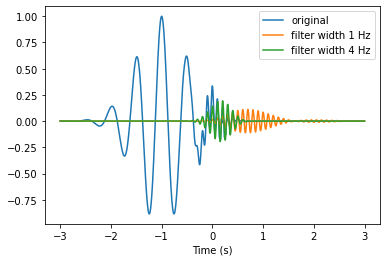

In [93]:
lowcut = 9.5
highcut = 10.5
order = 3

nyq = 0.5 * (1/dt)
low = lowcut / nyq
high = highcut / nyq
b, a = butter(order, [low, high], btype='band')

x_filtered_narrow = lfilter(b, a, x)

plt.plot(t, x, label='original')
plt.plot(t, x_filtered_narrow, label='filter width 1 Hz')
plt.plot(t, x_filtered_3, label='filter width 4 Hz')
plt.legend()
plt.xlabel("Time (s)")
plt.show()


We know that for any signal, the product of its bandwidth and duration must be above a certain value. When we use a narrow filter, we are essentially reducing the bandwidth of the filtered signal. Hence, its duration increases, or in other words, it becomes less localized in time.

## Part 3: A LTI model of neurovascular coupling

Functional Magnetic Resonance Imaging measures the Blood Oxygen Level Dependent (BOLD) signal related to the concentration of oxyhemoglobin in the brain tissue and is used to assess functional brain activity. 

While the link between neural activity and BOLD is complex, involving several non-linear phenomena, and still elusive, the fMRI community has since long used a linear time invariant system to model this relation. The impulse response of this model is called the Hemodynamic Response Function (HRF), and can be used to investiagte properties of neural activity based on fMRI measurements.

### Reference HRF
We first define a reference HRF in continuous time, similar to those used in popular software such as SPM (https://www.fil.ion.ucl.ac.uk/spm/).

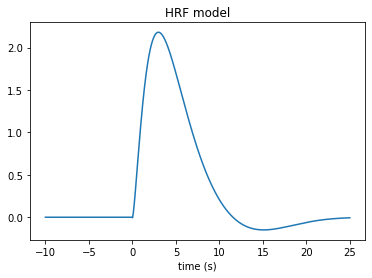

In [94]:
import scipy.stats as stats

def hrf(t):
    pars = [2.5, 2.02, 14.5, 0.247]
    resp = pars[2]*stats.gamma.pdf(t,pars[0],scale = pars[1])-pars[3]*np.exp(-(t-25/2)**2/(12/1.8)**2)
    resp[t<0] = 0
    return resp

t= np.arange(-10,25,.01)

plt.plot(t,hrf(t))
plt.title('HRF model')
plt.xlabel('time (s)')
plt.show()

### LFP based model

As an approximation for the neural activity, i.e. the input of the HRF-based model, we can take the time resolved power of gamma band oscillations (~40-90Hz) of the local-field potential activity recorded intracranially in a monkey brain. You can check this papers for further details:
https://www.ncbi.nlm.nih.gov/pubmed/11449264
https://www.jneurosci.org/content/32/4/1395

Let us load such gamma power signal available at https://owncloud.tuebingen.mpg.de/index.php/s/3HN9jAmGW7miZ4t, sampled at approximately 132Hz (1/dt, and put it in the current directory). We will also remove the mean and normalize the amplitude for simplicity. We will now call this normalized input signal $x$.

Text(0.5, 0, 'time (s)')

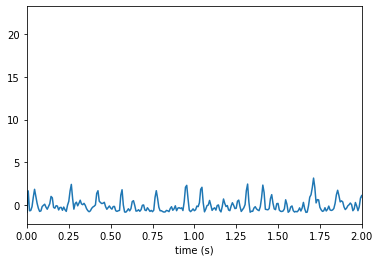

In [95]:
gpow = np.load('gammaPower.npz')
x = gpow['x']
x = x -np.mean(x)
x = x/np.std(x)
dt = gpow['dt']
t = np.arange(len(x))*dt
plt.plot(t,x)
plt.xlim([0,2])
plt.gca().set_xlabel('time (s)')

We use the *hrf* function to sample the impulse response at the sampling frequency of the above downsampled signal $x(t)$ (at approximately 132Hz). Note the impulse response is causal (values before $t=0$ are zero). We can thus sample the hrf on an interval [0,25s]. We will use this sampled HRF, that we will call $h$ to compute an estimate $y$ of the BOLD signal.

(3301,)


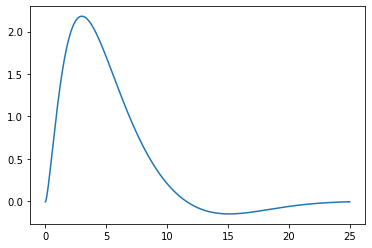

In [96]:
tsamp = np.arange(0,25,dt)
h = hrf(tsamp)
plt.plot(tsamp,h)
print(h.shape)

We use tools from the stats models toolbox to estimate second order statistics.

In [97]:
from statsmodels.tsa.stattools import acovf,ccovf
help(ccovf)

Help on function ccovf in module statsmodels.tsa.stattools:

ccovf(x, y, adjusted=True, demean=True)
    Calculate the crosscovariance between two series.
    
    Parameters
    ----------
    x, y : array_like
       The time series data to use in the calculation.
    adjusted : bool, optional
       If True, then denominators for autocovariance is n-k, otherwise n.
    demean : bool, optional
        Flag indicating whether to demean x and y.
    
    Returns
    -------
    ndarray
        The estimated crosscovariance function.
    
    Notes
    -----
    This uses np.correlate which does full convolution. For very long time
    series it is recommended to use fft convolution instead.



To ease their use, we will use the following function to estimate the cross-correlation between stationnary signals $X[t]$ and $Y[t]$, $\gamma_{XY}(\tau)$ as defined in the lecture:
$$
\gamma_{XY}(\tau) = \mathbb{E}[X[0]Y[\tau]]
$$

In [98]:
def crossCorr(X, Y, maxLag):
    """
    Returns the cross covariance between X and Y up to maximum lag maxLag:
    Arguments:
    - X: first time series,
    - Y: second time series,
    - maxLag: integer maximum lag
    Outputs:
    - corxy: crosscorrelation function
    - tau: lag axis (from -maxLag to +maxLag)
    
    """
    posCor = ccovf(Y,X,unbiased=False)
    negCor = ccovf(X,Y,unbiased=False)
    corxy = np.concatenate([negCor[-1:0:-1],posCor])
    lags = np.arange(-len(negCor)+1,len(posCor))
    idxLag = np.abs(lags)<=maxLag
    tau = lags[idxLag]
    corxy = corxy[idxLag]
    return corxy, tau


**Question 3**
 - (a) (1 point) Generate a simulated BOLD signal $y(t)$ by convolving the gamma power signal $x(t)$ by the sampled HRF $h$ (e.g. using np.convolve), and then adding a Gaussian white noise of variance 1. Plot the resulting simulated BOLD signal.
 

Text(0.5, 0, 'Time (s)')

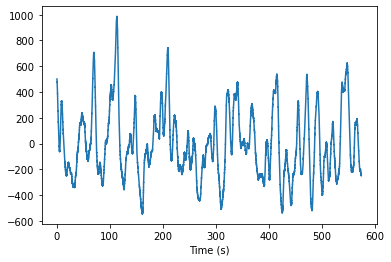

In [99]:
y = np.convolve(x, h, mode='valid')
y_noisy = y + np.random.normal(size=y.size)

plt.plot(np.arange(len(y_noisy))*dt, y_noisy)
plt.xlabel("Time (s)")

 - (b) (2 points) Compute and plot the autocovariance functions of $x(t)$ and $y(t)$, and the cross-covariance $\gamma_{xy}$  between them for a lag axis of [-40,40] **seconds** (normalize their amplitude to their respective maximum to allow comparison on the same graph). Justify the location of the maxima of the two functions.
 
 

In [100]:
maxLag = np.int(40/dt)
autocorr_x, tau = crossCorr(x, x, maxLag)
autocorr_y, tau = crossCorr(y_noisy, y_noisy, maxLag)
corrxy, tau = crossCorr(x, y_noisy, maxLag)

autocorr_x_normalize = autocorr_x/np.max(np.abs(autocorr_x))
autocorr_y_normalize = autocorr_y/np.max(np.abs(autocorr_y))
corrxy_normalize = corrxy/np.max(np.abs(corrxy))

<ipython-input-100-127a00bd3888>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  maxLag = np.int(40/dt)
<ipython-input-98-f66694139b6a>:13: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  posCor = ccovf(Y,X,unbiased=False)
<ipython-input-98-f66694139b6a>:14: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  negCor = ccovf(X,Y,unbiased=False)


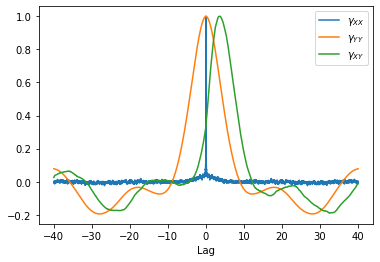

In [108]:
plt.plot(tau*dt, autocorr_x_normalize, label=r'$\gamma_{XX}$')
plt.plot(tau*dt, autocorr_y_normalize, label=r'$\gamma_{YY}$')
plt.plot(tau*dt, corrxy_normalize, label=r'$\gamma_{XY}$')
plt.xlabel("Lag")
plt.legend()
plt.show()

Since variance is always greater than covariance, peak of the autocorrelation will always be at zero. Since y lags behind x, we see that the peak in the plot of autocorrelation is at a positive value of lag (this value is equal to the location of the peak in the HRF function).

 - (c) (3 points) We aim at estimating the filter $h(t)$ based only on its input $x(t)$ and output $y(t)$. Use the cross-correlation function estimates to build the matrix $A$ and vector $d$ seen in lecture 7, slide 15 (identification of a FIR model). To construct $A$, you can check and use the *scipy.linalg.toeplitz* routine. For simplicity, choose the size of the maximum delay $p$ that corresponds to the length of the true sampled HRF $h$.
 

In [102]:
from scipy.linalg import toeplitz

p = h.size
c = autocorr_x[np.logical_and(tau <= p, tau >= 0)]

A = toeplitz(c)
d = corrxy[np.logical_and(tau <= p, tau >= 0)].reshape((-1, 1))

 - (d) (2 points) Solve the linear system $A\hat{h}=d$, using *scipy.linalg.solve*, in order to get an estimate $\hat{h}$ of $h$. Is the fit qualitatively good?
 

 

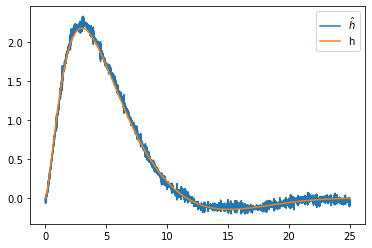

In [103]:
from scipy.linalg import solve

h_estimated = solve(A, d)
plt.plot(tsamp, h_estimated.flatten()[:-1], label=r'$\hat{h}$')
plt.plot(tsamp, h, label='h')
plt.legend()
plt.show()

The estimated HRF ($\hat{h}$) is very close to the true HRF ($h$).

 - (e) (2 points) The original estimate was based on the full time course of the signals (600s). Quantify how varies the mean square error of the estimate of $h$ when we estimate auto- and cross-correlation functions only from on initial segment of data of $30$, $100$, and $200s$. 

In [104]:
from sklearn.metrics import mean_squared_error

def compute_MSE(x, y):
    p = h.size
    
    autocorr_x, tau = crossCorr(x, x, maxLag)
    autocorr_y, tau = crossCorr(y, y, maxLag)
    corrxy, tau = crossCorr(x, y, maxLag)
    c = autocorr_x[np.logical_and(tau <= p, tau >= 0)]
    A = toeplitz(c)
    d = corrxy[np.logical_and(tau <= p, tau >= 0)].reshape((-1, 1))
    h_estimated = solve(A, d).flatten()[:-1]
    
    return mean_squared_error(h, h_estimated)

In [105]:
segment_durations = [30, 100, 200, 600]
errors = [compute_MSE(x[:int(duration/dt)], y_noisy[:int(duration/dt)]) for duration in segment_durations]

<ipython-input-98-f66694139b6a>:13: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  posCor = ccovf(Y,X,unbiased=False)
<ipython-input-98-f66694139b6a>:14: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  negCor = ccovf(X,Y,unbiased=False)
<ipython-input-98-f66694139b6a>:13: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  posCor = ccovf(Y,X,unbiased=False)
<ipython-input-98-f66694139b6a>:14: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  negCor = ccovf(X,Y,unbiased=False)
<ipython-input-98-f66694139b6a>:13: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  posCor = ccovf(Y,X,unbiased=False)
<ipython-input-98-f66694139b6a>:14: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  negCor = ccovf(X,Y,unbiased=False)
<ipython-input-98-f66694139b6a>:13: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjus

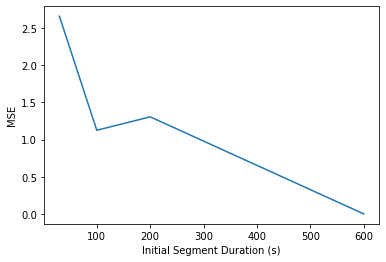

In [106]:
plt.plot(segment_durations, errors)
plt.xlabel("Initial Segment Duration (s)")
plt.ylabel("MSE")
plt.show()